# Assignment: K-Nearest Neighbor

## Overview

In this homework, you'll be applying the K-nearest neighbor (KNN) classification algorithm to a real-world machine learning data set. In particular, we will predict the affordability of a car given a diverse set of features, including the make, engine type, style,  and horsepower and other descriptive properties of the car.

Firstly, you will read in the dataset into a train and a test set, and you will create two feature sets. Secondly, you will implement different distance functions. Thirdly, you will implement one KNN classifier. Finally, you will assess the quality of your classifier by comparing its class predictions to the gold standard labels.




# Loading the data

**Instructions:** For this assignment we will develop a K-Nearest Neighbors (KNN) classifier to predict the 
affordability of cars. The list of classes is:

```
cheap
affordable
expensive
very expensive
```

We use a modified version of the Car data set from the UCI Machine learning repository.

The original data can be found here: https://archive.ics.uci.edu/ml/datasets/Automobile

The dataset consists of 204 instances. Each instance corresponds to a car which has a unique identifier (X; first field) and is characterized with 24 features as described in the file *car.names* which is provided as part of this assignment.

You need to first obtain this dataset, which is on Canvas (assignment 1). The files *car.features* and *car.labels* contain the data we will use in this notebook. Make sure the files are saved in the same folder as this notebook. 

Both files are in comma-separated value format. The first line in each file is a header, naming each feature (or label).

*car.features* contains 204 instances, one line per instance. The first field is the unique instance identifier. The following fields contain the 24 features, as described in the file *car.names*.

*car.labels* contains the gold labels (i.e., one of the four classes above), one instance per line. Again, the first field is the instance identifier, and the second field the instance label.

*car.names* contains additional explanations about the data set and the features.

All feature values are floats, and for Questions 1 through 5, we make the simplifying assumption that all values are indeed real-valued. You may want to revisit this assumption in Question 6.



**Task**: Read the two files  
1. create a **training_feature** set (list of features for the first 163 instances in the car.* files) and a **training_label** set (list of labels for the corresponding). 
2. create a **test_feature** set (list of features of the remaining instances in the car.* files) and a **test_label** set (list of labels for the corresponding). 
---------
- Do **not** shuffle the data.
- Do **not** modify feature or label representations. 
- Features must be represented as floats.
--------
You may use any Python packages you want, but not change the specified data types (i.e., they should be of type List, and *not* dataframe, dictionary etc).

In [1]:
data = open("car.features", 'r').readlines()
labels = open("car.labels", 'r').readlines()

train_features = []
train_labels   = []
test_features = []
test_labels   = []

inst_count = -1
inst_train_total = 163

#Process features
for instance in data:
    
    inst_count += 1
    instance = instance.strip()
    instance = instance.split(",")
    
    #Skip header row
    if inst_count == 0:
        continue
        
    else:
        
        inst_features = instance[1:]
        inst_features_float = [float(value) for value in inst_features]

        #Input data for training_feature set
        if inst_count <= inst_train_total:
            train_features.append(inst_features_float)
            
        #Input data for test_features set
        else:
            test_features.append(inst_features_float)        

        
inst_count = -1

#Process labels
for label in labels:
    
    inst_count += 1
    label = label.strip()
    label = label.split(",")
    
    #Skip header row
    if inst_count == 0:
        continue

    else:
        
        inst_labels = label[1:]
        
        #Input data for train_labels set
        if inst_count <= inst_train_total:
            train_labels.append(inst_labels)
            
        #Input data for test_labels set
        else:
            test_labels.append(inst_labels)
    

# Distance Functions

<b>Instructions</b>: Implement the three distance functions specified below. 

1. Euclidean distance
2. Cosine distance
3. Chebyshev distance, defined as:
    
    $d(x,y)=\max_{i}|x_i-y_i|$
    

Each distance function takes as input
- Two feature vectors (each of type List)

and returns as output
- The distance between the two feature vectors (float)

------------

Use <b>only</b> the library imported below, i.e., <b>do not</b> use implementations from any other Python library. 

In [2]:
import math


def euclidean_distance(fw1, fw2):

    squared_differences_sum = 0
    
    for i in range(len(fw1)):
        ai = fw1[i]
        bi = fw2[i]
        squared_differences_sum += (ai-bi) ** 2
        
    distance = math.sqrt(squared_differences_sum)
    
    return distance

def cosine_distance(fw1, fw2):
    
    numerator = 0
    denominator_a = 0
    denominator_b = 0
    
    for i in range(len(fw1)):
        ai = fw1[i]
        bi = fw2[i]
        numerator += ai*bi
        denominator_a += ai ** 2
        denominator_b += bi ** 2
    
    distance = 1 - (numerator / 
                    (math.sqrt(denominator_a)*math.sqrt(denominator_b)))
    
    return distance

def chebyshev_distance(fw1, fw2):
    
    distance = 0
    
    for i in range(len(fw1)):
        ai = fw1[i]
        bi = fw2[i]
        difference = abs(ai-bi)
        if difference > distance:
            distance = difference
    
    return distance



# KNN Classifier

<b>Instructions</b>: Here, you implement your KNN classifier. It takes as input 
- training data features
- training data labels
- test data features
- parameter K
- distance function(s) based on which nearest neighbors will be identified

It returns as output 
- the predicted labels for the test data

**Ties among distances**. If there are more than K instances with the same (smallest) distance value, consider the first K. For example, for K=1 if you have 3 instances (with identifiers i = 3, 12, 54) that all have the same distance to your test instance (e.g., 0.641), the instance with the smallest identifier should be selected as the nearest neighbor (in this case i = 3).

**Ties at prediction time.** Ties can also occur at class prediction time when two (or more) classes are supported by the same number of neighbors. In that case choose the class of the 1 nearest neighbor. The "1 nearest neighbor" refers only to those classes represented with the maximum support in the neighborhood. E.g., for K = 5, with a neighborhood ordered by distance: {'cheap', 'expensive', 'affordable', expensive', 'affordable'} you would choose the 1 nearest neighbor among {'expensive','affordable'}.

-----------

**You should implement the classifier from scratch yourself**, i.e., <b> you must not</b> use an existing implementation in any Python library. You may use Python packages (e.g., math, numpy, collections, ...) to help with your implementation.

# Weighted KNN Classifier

<b>Instructions</b>: Extend your implementation of the KNN classifier to a Weighted KNN classifier. You should change the code in the cell above. Use Inverse Distance as weights:

$w_j=\frac{1}{d_j+\epsilon}$

where

- $d_j$ is the distance of of the jth nearest neighbor to the test instance
- $\epsilon=0.000001$

Use the Boolean parameter `weighted` to specify the KNN version when calling the function.

In [3]:
import numpy as np

def KNN(train_features, train_labels, test_features, k, dist_fun, weighted=False):
    
    predictions = []
    
    #Iterate over each test instance
    for test_num in range(len(test_features)):

        #Calculate and store distance against each train instance
        distance_tracker = np.array([])
        for train_num in range(len(train_features)):
            distance = dist_fun(test_features[test_num],train_features[train_num])
            distance_tracker = np.append(distance_tracker, distance)
        
        #Extract results of train instance with k smallest distances
        #Ties among distances will be resolved with the smallest identifier since distance tracker
        #is originally created in order of the original data's identifier
        k_smallest_dist = np.sort(distance_tracker)[:k]
        
        #Find and store corresponding label of the train instance with k smallest distance
        neighbors_label = []
        neighbors_identifier = []

        #Pre-sorted by distance as k_smallest_dist is sorted
        for dist_k in k_smallest_dist:
            
            #Pre-sorted by identifier as distance_tracker is filled in the original order of data
            for dist in range(len(distance_tracker)):
                
                #Find the corresponding label and identifier of elements in k_smallest_dist
                if dist_k == distance_tracker[dist]:
                    neighbors_label.append(train_labels[dist])
                    neighbors_identifier.append(dist)
                    break #Ensure only match the first occurance in distance_tracker (i.e. smallest identifier)
        
        #Prediction time
        #Since we will iterate over labels with closest distance first, the max_freq/max_weight
        #would not be updated if there is a same value in later iterations
        
        label_chosen = 'N/A'

        #Majority Voting
        if weighted==False:
            
            max_freq = 0
            
            for label in neighbors_label:
                freq = neighbors_label.count(label)
                if freq > max_freq:
                    max_freq = freq
                    label_chosen = label
        
        #Inverse Distance
        elif weighted==True:
            
            max_weight = 0
            labels = []
            
            #To remove duplicate values in neighbors_label, but preserve original order
            for x in neighbors_label:
                if x not in labels:
                    labels.append(x)
            
            #Calculate weight for each label
            for label in labels:
                
                weight = 0
                for n in range(len(neighbors_label)):
                    if label == neighbors_label[n]:
                        weight += 1 / (distance_tracker[neighbors_identifier[n]]+0.000001)

                if weight > max_weight:
                    max_weight = weight
                    label_chosen = label
                    
        predictions.append(label_chosen)
        
    return predictions


# Analysis
    
Consider these two sets of attributes: (curb-weight,engine-size) and (compression-ratio, peak-rpm)

For each set of features, create a scatter plot of data points coloring instances from each class differently. You should produce **two plots** which show the scattered data points colored by class label. Label the x-axis and y-axis. [*N.B. you may use libraries like <a href="https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py">matplotlib</a> or <a href="https://seaborn.pydata.org/introduction.html">seaborne</a>*]
 

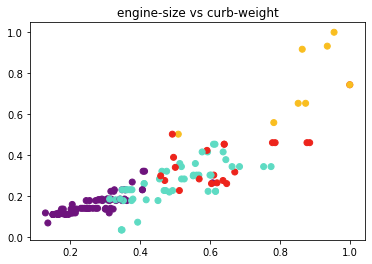

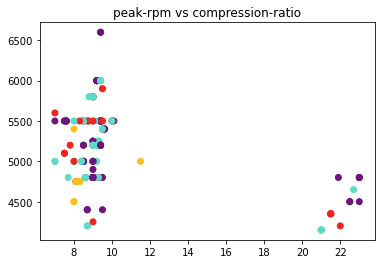

In [4]:
import matplotlib.pyplot as plt

def scatter_plot(x, y):

    #Process data for x-axis
    x_axis = data[0].split(',').index(x)-1
    x_axis_data = np.array([])

    for i in range(len(train_features)):
        x_axis_data = np.append(x_axis_data, train_features[i][x_axis])

    #Process data for y-axis
    y_axis = data[0].split(',').index(y)-1
    y_axis_data = np.array([])

    for i in range(len(train_features)):
        y_axis_data = np.append(y_axis_data, train_features[i][y_axis])

    #Convert nominal to numeric for training label data
    label_set = ['cheap','affordable','expensive','very expensive']
    label_num = []
    for label in train_labels:
        num_value = label_set.index(label[0])
        label_num.append(num_value)

    #cheap -> #6E147D (purple)
    #affordable -> #5EDBC3 (turquoise)
    #expensive -> #ED241C (red)
    #very expensive -> #F9BE20 (yellow)
    color = np.array(['#6E147D','#5EDBC3','#ED241C','#F9BE20'])

    plt.scatter(x_axis_data, y_axis_data, c=color[label_num])
    plt.title(y + ' vs ' + x)
    plt.show()

#Plot 1: curb-weight,engine-size
scatter_plot('curb-weight','engine-size')

#Plot 2: compression-ratio, peak-rpm
scatter_plot('compression-ratio','peak-rpm')
